# New York Traffic Accident Predictor


Dataset: https://www.kaggle.com/datasets/hfan83/traffic-accidents-in-ny-2023/data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

## 1. Exploratory Data Analysis


In [4]:
df = pd.read_csv('traffic_accidents_in_NY.csv')

df.head()


,AccidentID,DateTime,County,WeatherCondition,RoadCondition,VehicleType,SeverityLevel,NumberOfVehicles,NumberOfInjuries,Cause,Junction,Traffic_Signal,Bump
0,A00000,4/8/2023 3:31,Queens,Rainy,Dry,Car,Minor,1,4,Drunk Driving,False,True,False
1,A00001,8/23/2023 23:07,Queens,Snowy,Under Construction,Car,Moderate,2,5,Drunk Driving,False,False,False
2,A00002,10/12/2023 4:49,Staten Island,Sunny,Wet,Car,Moderate,2,4,Distracted Driving,True,True,True
3,A00003,6/6/2023 23:23,Staten Island,Sunny,Under Construction,Truck,Minor,2,5,Distracted Driving,True,False,False
4,A00004,3/5/2023 12:31,Brooklyn,Sunny,Wet,Motorcycle,Moderate,2,2,Speeding,True,True,True


In [5]:
df.shape

(10200, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentID        10200 non-null  object
 1   DateTime          10200 non-null  object
 2   County            10200 non-null  object
 3   WeatherCondition  9870 non-null   object
 4   RoadCondition     9249 non-null   object
 5   VehicleType       9986 non-null   object
 6   SeverityLevel     9778 non-null   object
 7   NumberOfVehicles  10200 non-null  int64 
 8   NumberOfInjuries  10200 non-null  int64 
 9   Cause             10200 non-null  object
 10  Junction          10200 non-null  bool  
 11  Traffic_Signal    10200 non-null  bool  
 12  Bump              10200 non-null  bool  
dtypes: bool(3), int64(2), object(8)
memory usage: 826.9+ KB


In [8]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccidentID,10200,10000,A07850,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateTime,10200,9897,6/9/2023 3:56,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,10200,5,The Bronx,2093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeatherCondition,9870,4,Sunny,5464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoadCondition,9249,3,Wet,3101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleType,9986,4,Car,2520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeverityLevel,9778,3,Moderate,5561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfVehicles,10200.0,NaN,NaN,NaN,1.704412,0.897524,1.0,1.0,1.0,2.0,4.0
NumberOfInjuries,10200.0,NaN,NaN,NaN,4.955,5.126198,0.0,2.0,5.0,7.0,45.0
Cause,10200,4,Distracted Driving,3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1200x600 with 0 Axes>

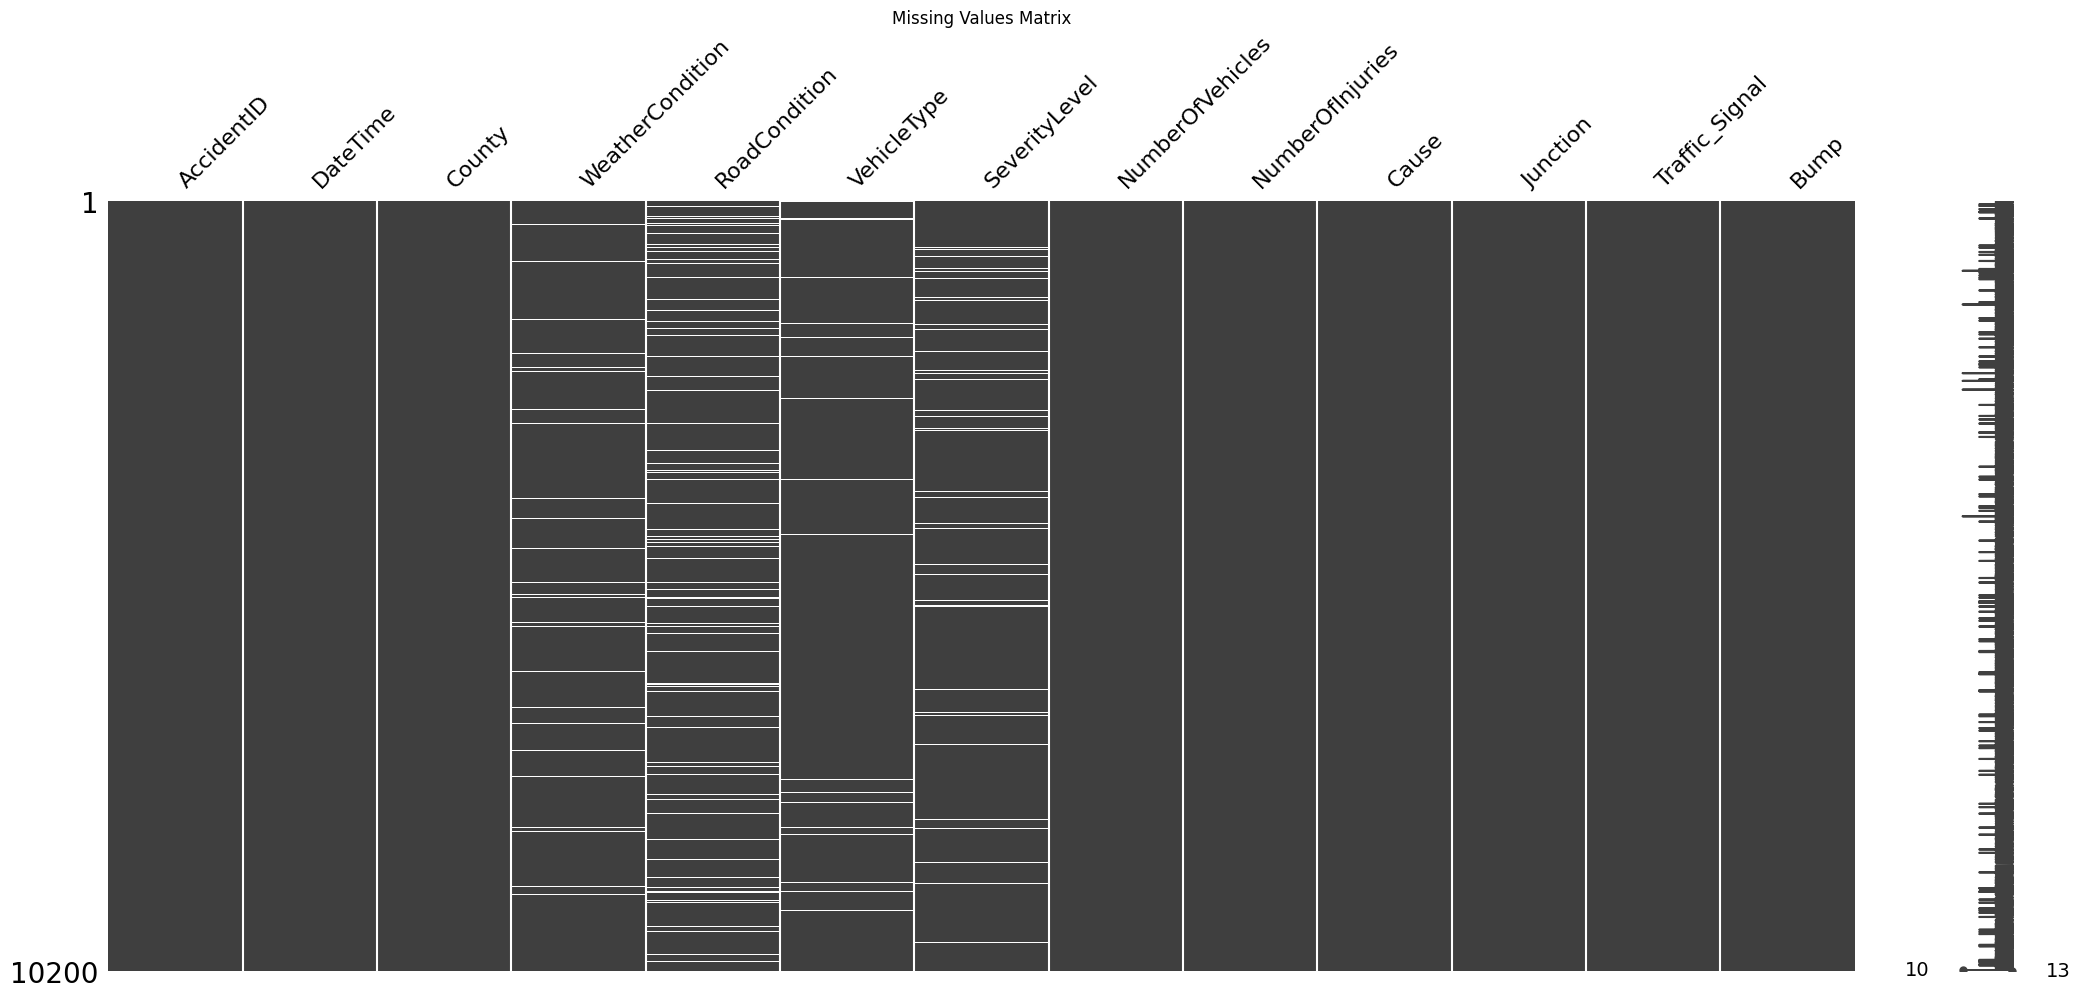

In [10]:
# Missing Values Analysis
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

In [11]:
# Calculate percentage of missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values Percentages:")
print(missing_percentages[missing_percentages > 0])


Missing Values Percentages:
WeatherCondition    3.235294
RoadCondition       9.323529
VehicleType         2.098039
SeverityLevel       4.137255
dtype: float64


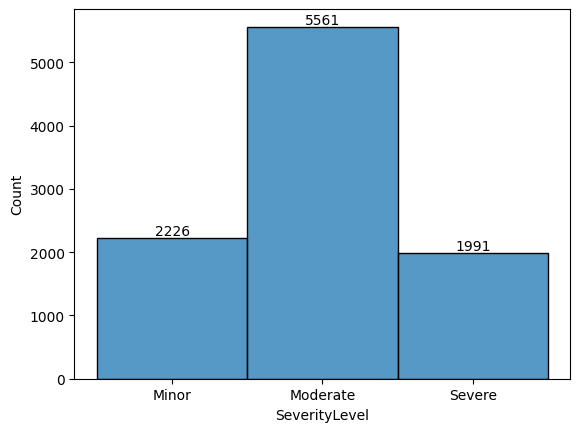

In [14]:
# Target Variable Analysis
ax = sns.histplot(data=df, x='SeverityLevel')
ax.bar_label(ax.containers[0])
plt.show()

In [18]:
# Display unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}\n")

Unique values in 'AccidentID': ['A00000' 'A00001' 'A00002' ... 'A09997' 'A09998' 'A09999']

Unique values in 'DateTime': ['4/8/2023 3:31' '8/23/2023 23:07' '10/12/2023 4:49' ... '5/1/2023 16:12'
 '3/19/2023 12:09' '8/6/2023 13:50']

Unique values in 'County': ['Queens' 'Staten Island' 'Brooklyn' 'Manhattan' 'The Bronx']

Unique values in 'WeatherCondition': ['Rainy' 'Snowy' 'Sunny' 'Foggy' nan]

Unique values in 'RoadCondition': ['Dry' 'Under Construction' 'Wet' nan]

Unique values in 'VehicleType': ['Car' 'Truck' 'Motorcycle' nan 'Bus']

Unique values in 'SeverityLevel': ['Minor' 'Moderate' 'Severe' nan]

Unique values in 'NumberOfVehicles': [1 2 4 3]

Unique values in 'NumberOfInjuries': [ 4  5  2  9  1  0  7  3  6  8 45]

Unique values in 'Cause': ['Drunk Driving' 'Distracted Driving' 'Speeding' 'Poor Road Condition']

Unique values in 'Junction': [False  True]

Unique values in 'Traffic_Signal': [ True False]

Unique values in 'Bump': [False  True]



In [19]:
df.isnull().sum()


AccidentID            0
DateTime              0
County                0
WeatherCondition    330
RoadCondition       951
VehicleType         214
SeverityLevel       422
NumberOfVehicles      0
NumberOfInjuries      0
Cause                 0
Junction              0
Traffic_Signal        0
Bump                  0
dtype: int64

In [22]:
# Delete nan values
df.dropna(inplace=True)
df.isnull().sum()

AccidentID          0
DateTime            0
County              0
WeatherCondition    0
RoadCondition       0
VehicleType         0
SeverityLevel       0
NumberOfVehicles    0
NumberOfInjuries    0
Cause               0
Junction            0
Traffic_Signal      0
Bump                0
dtype: int64

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

df_encoded = pd.get_dummies(df, columns=['County', 'WeatherCondition', 'RoadCondition', 'VehicleType', 'Cause'])

X = df_encoded.drop(columns=['SeverityLevel', 'AccidentID', 'DateTime'])
y = df_encoded['SeverityLevel']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                             Feature  Importance
1                   NumberOfInjuries    0.273685
0                   NumberOfVehicles    0.114663
2                           Junction    0.051436
3                     Traffic_Signal    0.047965
4                               Bump    0.034950
16                 RoadCondition_Wet    0.028579
14                 RoadCondition_Dry    0.026783
9                   County_The Bronx    0.026640
13            WeatherCondition_Sunny    0.026510
21          Cause_Distracted Driving    0.026069
15  RoadCondition_Under Construction    0.025805
7                      County_Queens    0.025666
18                   VehicleType_Car    0.024675
20                 VehicleType_Truck    0.024635
5                    County_Brooklyn    0.024541
6                   County_Manhattan    0.024247
22               Cause_Drunk Driving    0.024042
19            VehicleType_Motorcycle    0.023996
17                   VehicleType_Bus    0.023204
23         Cause_Poo

In [33]:
del df['AccidentID']
del df['DateTime']
df.head()

,County,WeatherCondition,RoadCondition,VehicleType,SeverityLevel,NumberOfVehicles,NumberOfInjuries,Cause,Junction,Traffic_Signal,Bump
0,Queens,Rainy,Dry,Car,Minor,1,4,Drunk Driving,False,True,False
1,Queens,Snowy,Under Construction,Car,Moderate,2,5,Drunk Driving,False,False,False
2,Staten Island,Sunny,Wet,Car,Moderate,2,4,Distracted Driving,True,True,True
3,Staten Island,Sunny,Under Construction,Truck,Minor,2,5,Distracted Driving,True,False,False
4,Brooklyn,Sunny,Wet,Motorcycle,Moderate,2,2,Speeding,True,True,True


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import optuna
import numpy as np

# Prepare the data
le = LabelEncoder()
y = le.fit_transform(df['SeverityLevel'])
X = df_encoded.drop(columns=['SeverityLevel', 'AccidentID', 'DateTime'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model optimization function
def optimize_model(trial, model_type):
    if model_type == 'rf':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
        }
        model = RandomForestClassifier(**params)
    elif model_type == 'xgb':
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'n_estimators': trial.suggest_int('n_estimators', 50, 300)
        }
        model = XGBClassifier(**params)
    elif model_type == 'nn':
        model = Sequential([
            Dense(trial.suggest_int('units', 32, 128), activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(trial.suggest_float('dropout', 0.1, 0.5)),
            Dense(len(np.unique(y)), activation='softmax')
        ])
        model.compile(
            optimizer=Adam(trial.suggest_float('learning_rate', 1e-4, 1e-2)),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
    if model_type == 'nn':
        model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=0)
        y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    return accuracy_score(y_test, y_pred)

# Train and tune models for 3 different aspects
models = ['rf', 'xgb', 'nn']
results = {}

for model_type in models:
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: optimize_model(trial, model_type), n_trials=10)
    
    # Store results
    results[model_type] = {
        'best_accuracy': study.best_value,
        'best_params': study.best_params
    }
    
    print(f"\n{model_type.upper()} Results:")
    print(f"Best Accuracy: {study.best_value:.4f}")
    print(f"Best Parameters: {study.best_params}")

[I 2024-12-06 00:42:40,024] A new study created in memory with name: no-name-cf033eea-1d84-4c36-8c02-2d4945de4479


[I 2024-12-06 00:42:44,458] Trial 0 finished with value: 0.5488250652741514 and parameters: {'n_estimators': 83, 'max_depth': 8, 'min_samples_split': 9}. Best is trial 0 with value: 0.5488250652741514.
[I 2024-12-06 00:42:46,447] Trial 1 finished with value: 0.5488250652741514 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 8}. Best is trial 0 with value: 0.5488250652741514.
[I 2024-12-06 00:42:50,362] Trial 2 finished with value: 0.5488250652741514 and parameters: {'n_estimators': 219, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 0 with value: 0.5488250652741514.
[I 2024-12-06 00:42:53,038] Trial 3 finished with value: 0.5488250652741514 and parameters: {'n_estimators': 173, 'max_depth': 5, 'min_samples_split': 3}. Best is trial 0 with value: 0.5488250652741514.
[I 2024-12-06 00:42:53,928] Trial 4 finished with value: 0.5488250652741514 and parameters: {'n_estimators': 75, 'max_depth': 6, 'min_samples_split': 10}. Best is trial 0 with value: 0.54882


RF Results:
Best Accuracy: 0.5488
Best Parameters: {'n_estimators': 83, 'max_depth': 8, 'min_samples_split': 9}


[I 2024-12-06 00:43:13,855] Trial 0 finished with value: 0.4783289817232376 and parameters: {'learning_rate': 0.08620122355251536, 'max_depth': 7, 'n_estimators': 297}. Best is trial 0 with value: 0.4783289817232376.
[I 2024-12-06 00:43:19,627] Trial 1 finished with value: 0.4516971279373368 and parameters: {'learning_rate': 0.26328503835626843, 'max_depth': 9, 'n_estimators': 155}. Best is trial 0 with value: 0.4783289817232376.
[I 2024-12-06 00:43:27,095] Trial 2 finished with value: 0.4715404699738903 and parameters: {'learning_rate': 0.08200306836664358, 'max_depth': 8, 'n_estimators': 266}. Best is trial 0 with value: 0.4783289817232376.
[I 2024-12-06 00:43:31,449] Trial 3 finished with value: 0.4527415143603133 and parameters: {'learning_rate': 0.25557620071426523, 'max_depth': 7, 'n_estimators': 192}. Best is trial 0 with value: 0.4783289817232376.
[I 2024-12-06 00:43:34,271] Trial 4 finished with value: 0.47571801566579636 and parameters: {'learning_rate': 0.21847906760694213, 


XGB Results:
Best Accuracy: 0.5149
Best Parameters: {'learning_rate': 0.22494139840312674, 'max_depth': 5, 'n_estimators': 110}
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-12-06 00:45:17,071] Trial 0 finished with value: 0.5383812010443865 and parameters: {'units': 116, 'dropout': 0.13153663632642246, 'learning_rate': 0.0017668600851623753}. Best is trial 0 with value: 0.5383812010443865.


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2024-12-06 00:45:56,824] Trial 1 finished with value: 0.5420365535248042 and parameters: {'units': 103, 'dropout': 0.22287690001015875, 'learning_rate': 0.006617941333821262}. Best is trial 1 with value: 0.5420365535248042.


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2024-12-06 00:46:50,398] Trial 2 finished with value: 0.5488250652741514 and parameters: {'units': 123, 'dropout': 0.41049502734718835, 'learning_rate': 0.006181544960585047}. Best is trial 2 with value: 0.5488250652741514.
[W 2024-12-06 00:47:10,559] Trial 3 failed with parameters: {'units': 65, 'dropout': 0.27397403179707347, 'learning_rate': 0.002607191228081677} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\alperugurcan\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_8884\3422951972.py", line 63, in <lambda>
    study.optimize(lambda trial: optimize_model(trial, model_type), n_trials=10)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_8884\3422951972.py", lin

KeyboardInterrupt: 

## Go on with rf model
